In [1]:
import os 
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/*.png')

In [3]:
path = data_path[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/32270_deer.png'

In [4]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [5]:
image.shape

TensorShape([32, 32, 3])

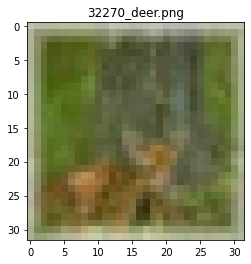

In [6]:
plt.title(os.path.basename(path))
plt.imshow(image)
plt.show()

# tf.data

In [41]:
train_paths = glob('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/*.png')
train_paths[:10]

['../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/32270_deer.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/21851_cat.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/48309_deer.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/33547_truck.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/45202_automobile.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/2789_bird.png',
 '../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:A

In [42]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [46]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image)

In [47]:
# next(iter()) for문으로 돌릴때 하나만 가지고 나옴
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

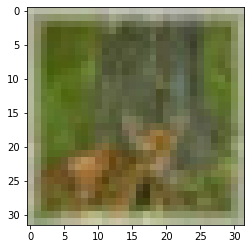

In [48]:
plt.imshow(tf_image)
plt.show()

## Batch로 묶기

In [49]:
batch_size = 8

In [50]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)

In [51]:
# 배치 사이즈만큼 묶인것을 확인
tf_images = next(iter(dataset))
tf_images.shape

TensorShape([8, 32, 32, 3])

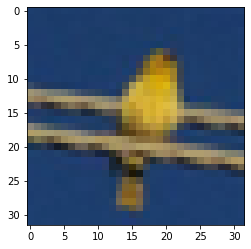

In [52]:
plt.imshow(tf_images[5])
plt.show()

## Shuffle 하기

In [53]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(batch_size)
dataset = dataset.shuffle(buffer_size=len(train_paths)) #데이터 개수만큼 버퍼사이즈 주기

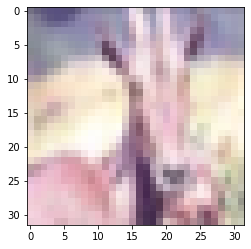

In [30]:
tf_images = next(iter(dataset))
plt.imshow(tf_images[1])
plt.show()

## Label하고 같이 넣기 

In [54]:
path = train_paths[0]
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/32270_deer.png'

In [55]:
# Label 얻기
class_name = path.split('_')[-1].replace('.png','')
class_name

'deer'

In [100]:
def get_label(path):
    return path.split('_')[-1].replace('.png','')

In [68]:
path, get_label(path)

('../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/46506_deer.png',
 'deer')

In [101]:

train_labels = []

for path in train_paths:
    x = get_label(path)
    train_labels.append(x)

train_labels[:10]

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship']

In [ ]:
# 중복을 제거하고 가져옴
class_names = np.unique(train_labels)
class_names

In [73]:
# onehot_encoding
onehot_encoding = np.array(class_names == 'frog', np.uint8)
onehot_encoding

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=uint8)

In [74]:
# onehot_encoding 함수 만들기
def onehot_encoding(label):
    return np.array(label == class_names, np.uint8)

In [75]:
def read_image_label(path, label):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image, label

In [51]:
labels = [onehot_encoding(cls_name) for cls_name in train_labels]

In [77]:
dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels)) # 튜플로 들어가짐
dataset = dataset.map(read_image_label) # input이 2개가 되어야함 함수 선언
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() # epoch을 반복할수 있게끔 해줌

In [78]:
image, label = next(iter(dataset))

In [80]:
image.shape

TensorShape([8, 32, 32, 3])

In [81]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>

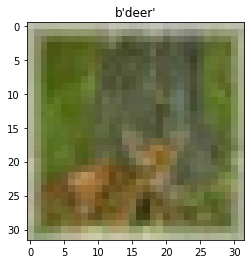

In [82]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()

In [83]:
dataset = tf.data.Dataset.from_tensor_slices((train_paths, train_labels)) # 튜플로 들어가짐 input이 2개
dataset = dataset.map(read_image_label) # input이 2개가 되어야함 함수 선언
dataset = dataset.batch(batch_size)
dataset = dataset.repeat() # epoch을 반복할수 있게끔 해줌

In [ ]:
# 이미지를 읽은 다음 
tf.py_function()

## tensorflow 함수로 label 얻기

In [84]:
path

'../../../Library/Mobile Documents/com~apple~CloudDocs/데이터사이언티스트/딥러닝:AI/Part3) 이미지 분석으로 배우는 tensorflow 2.0과 Pytorch/dataset/cifar/train/46506_deer.png'

In [86]:
def onehot_encoding(label):
    return np.array(label == class_names, np.uint8)

In [87]:
fname = tf.strings.split(path, '_')[-1] # strings 관련된 함수
cls_name = tf.strings.regex_replace(fname, '.png', '')
cls_name

<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>

In [90]:
# .cast는 onehot 인코딩 기능
onehot = tf.cast(class_names == cls_name, tf.uint8)
onehot

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)>

In [91]:
# 경로를 통해 파일명을 가져오고 onehot 인코딩하는 함수
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(class_names == cls_name, tf.uint8)
    return onehot

In [92]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)

    # get label
    label = get_label(path)
    return image, label

In [94]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

In [95]:
image, label = next(iter(dataset))

In [96]:
image.shape

TensorShape([8, 32, 32, 3])

In [98]:
label.shape

TensorShape([8, 10])

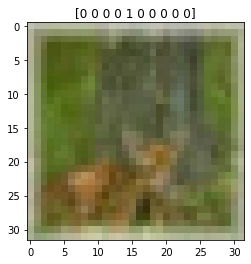

In [99]:
plt.title(np.array(label[0]))
plt.imshow(image[0])
plt.show()

###  data_path, path 선언

In [ ]:
# 경로를 통해 파일명을 가져오고 onehot 인코딩하는 함수
def get_label(path):
    fname = tf.strings.split(path, '_')[-1]
    cls_name = tf.strings.regex_replace(fname, '.png', '')
    onehot = tf.cast(class_names == cls_name, tf.uint8)
    return onehot

In [ ]:
def read_image_label(path):
    # read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)

    # get label
    label = get_label(path)
    return image, label

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(read_image_label)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()